In [1]:
from dataset_maker import *

/Users/gcodes/anaconda3/lib/python3.7/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [9]:
convert_acdc_dataset("/Users/gcodes/Downloads/ACDC_Dataset/training",
                     "ACDC_split/training_8-2", 
                     load_labels=True, val_ratio=0.2)

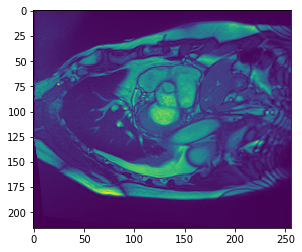

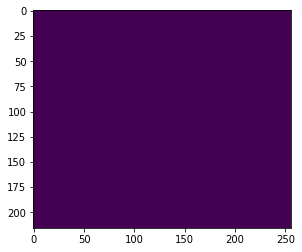

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.load("/Users/gcodes/Downloads/ACDC_Dataset/training_1-9/patient001/patient001_frame01_slice1.npy")
plt.imshow(x)
plt.show()
y = np.load("/Users/gcodes/Downloads/ACDC_Dataset/training_1-9/patient001/patient001_frame01_gt_slice1.npy")
plt.imshow(y)
plt.show()